In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
import taxis
import matplotlib.pyplot as plt
from utils import *
from sklearn.linear_model import *

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [51]:
DBNAME="taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952
x,y = get_grid_cell(LAT,LON,20)
x1,y1 = get_grid_cell(LAT1,LON1,20)
print x,y
print x1,y1

def plot(X,y,model):
    plt.scatter(X, y,color='g')
    plt.plot(X, model.predict(X),color='g')

    #plt.scatter(X, y, color='r')
    #plt.plot(X, y, color='r')
    plt.show()

24 12
20 5


In [16]:
data=taxis.fetch_loc_by_date('taxis.db','20170627',LAT,LON)
df=pd.DataFrame(data)
df.columns=['Time','X','Y','TaxiCount']
df.index.name='Point'
df.reset_index(level=0, inplace=True)
df.head()

,Point,Time,X,Y,TaxiCount
0,0,0000,24,12,50
1,1,0005,24,12,28
2,2,0010,24,12,44
3,3,0015,24,12,40
4,4,0020,24,12,44


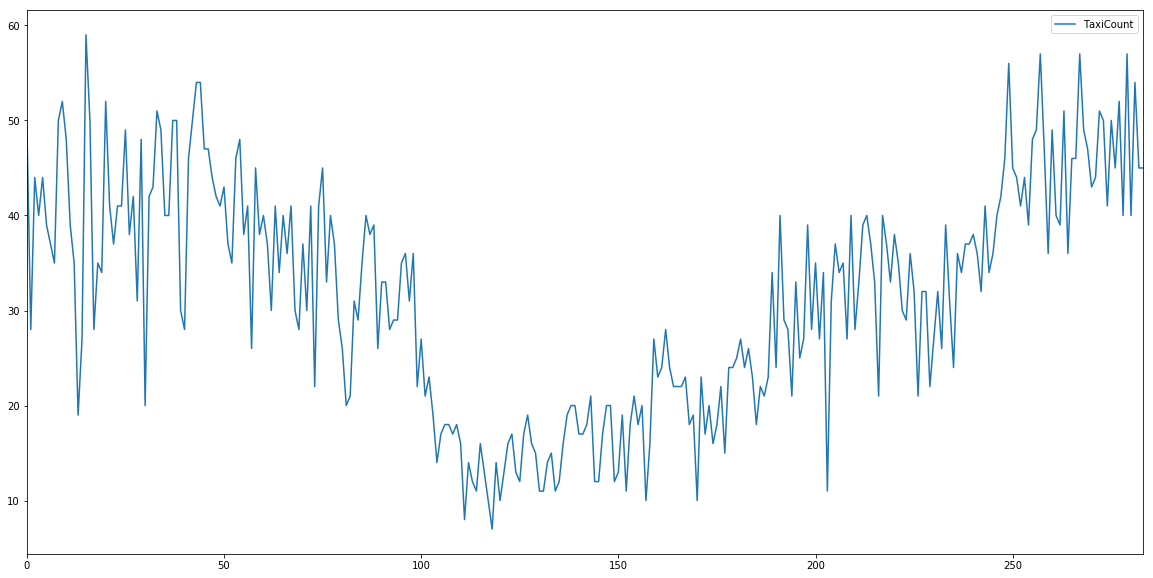

In [17]:
df.plot(y='TaxiCount')
plt.show()

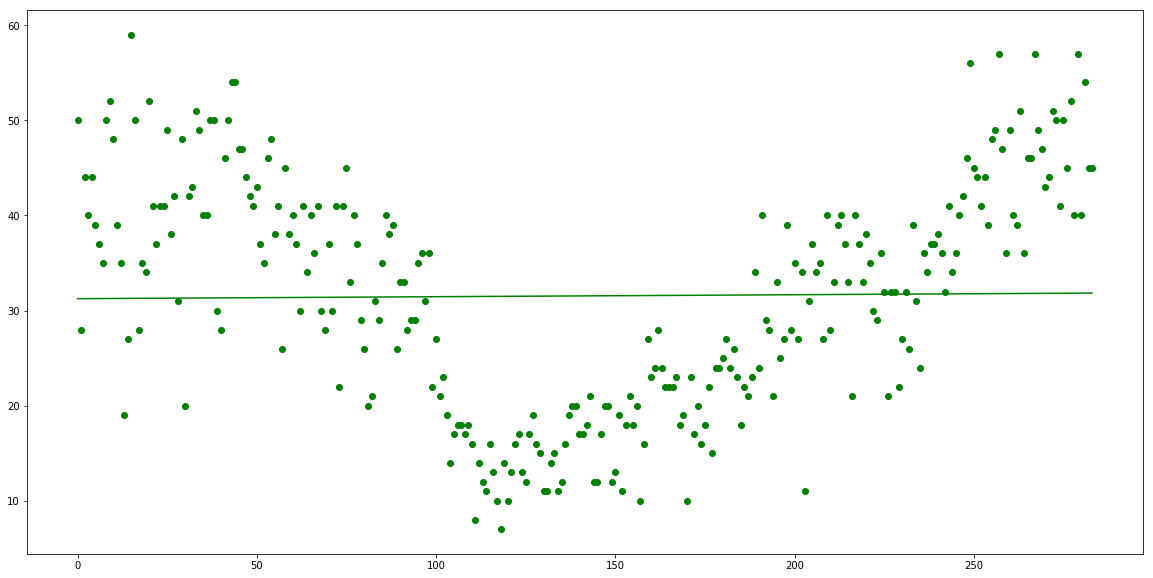

In [41]:
#Linear
model = LinearRegression()

X=df['Point'].as_matrix()
y=df['TaxiCount'].as_matrix()


X=X.reshape(-1,1)

model.fit(X,y)

plot(X,y,model)

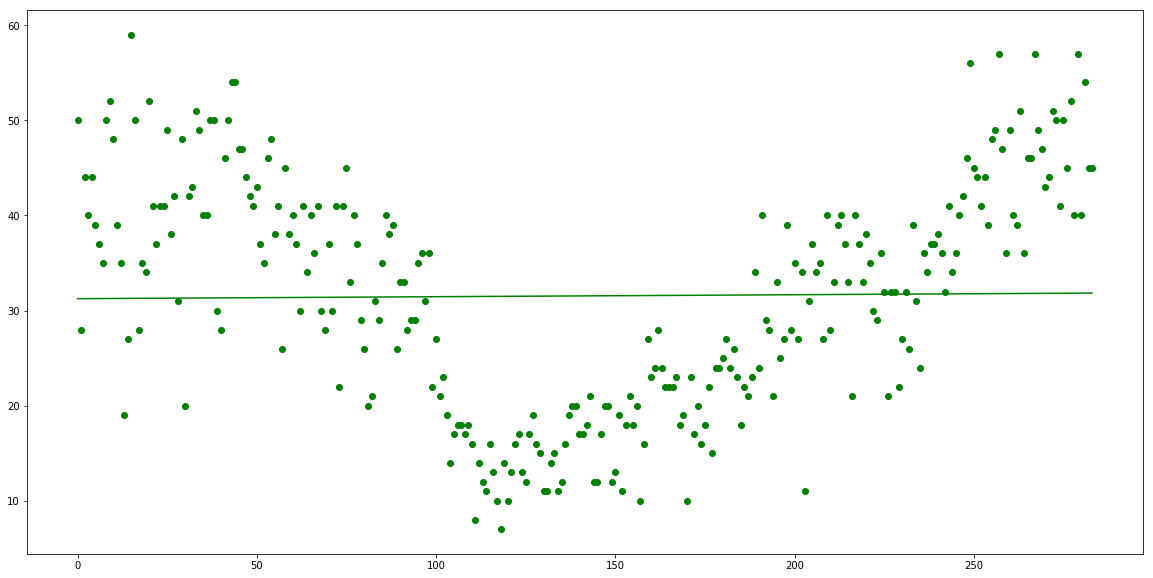

In [43]:
#Ridge
model = Ridge(alpha=0.5)

X=df['Point'].as_matrix()
y=df['TaxiCount'].as_matrix()

X=X.reshape(-1,1)

model.fit(X,y)

plot(X,y,model)

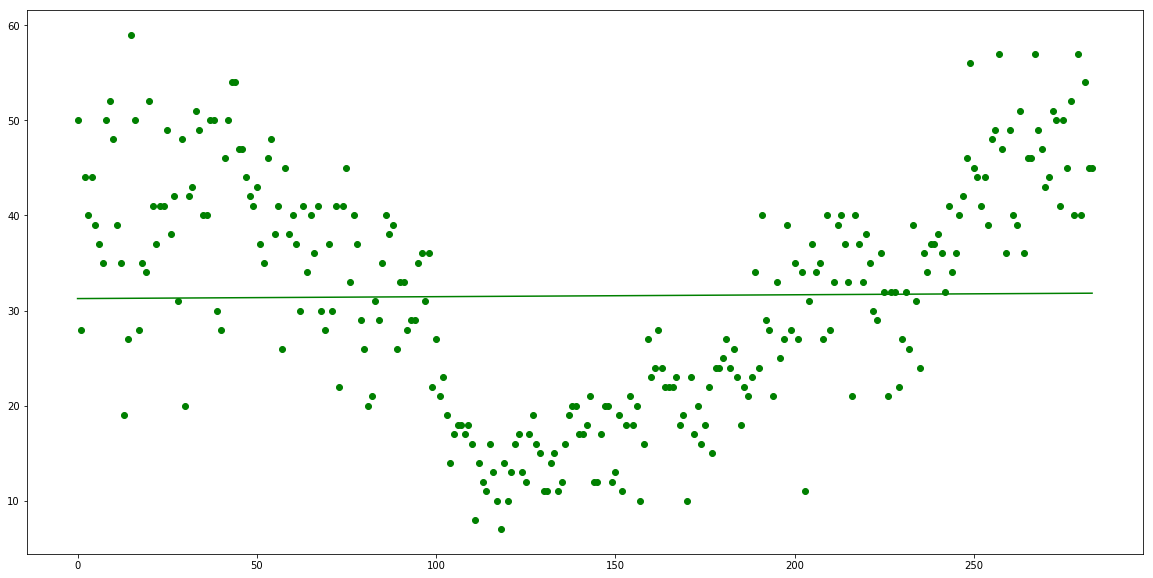

In [44]:
#Lasso
model = Lasso(alpha=0.5)

X=df['Point'].as_matrix()
y=df['TaxiCount'].as_matrix()

X=X.reshape(-1,1)

model.fit(X,y)

plot(X,y,model)

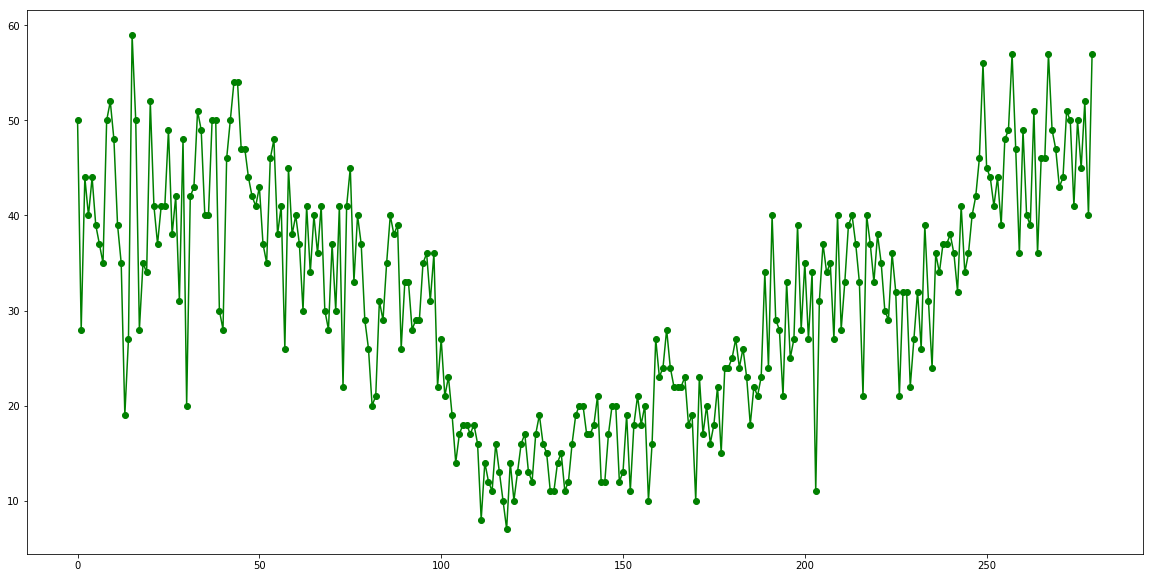

     Point  Time   X   Y  TaxiCount
279    279  2335  24  12         57
280    280  2340  24  12         40
281    281  2345  24  12         54
282    282  2350  24  12         45
283    283  2355  24  12         45
[56, 44, 10, 0, 0]


In [74]:
#Gaussian
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor(alpha=0,n_restarts_optimizer=2)

X=df.head(280)['Point'].as_matrix()
y=df.head(280)['TaxiCount'].as_matrix()

X=X.reshape(-1,1)

model.fit(X,y)

plot(X,y,model)

X_predict=np.array([279,280,281,282,283]).reshape(-1,1)


print df.tail()
print [int(x) for x in model.predict(X_predict)]

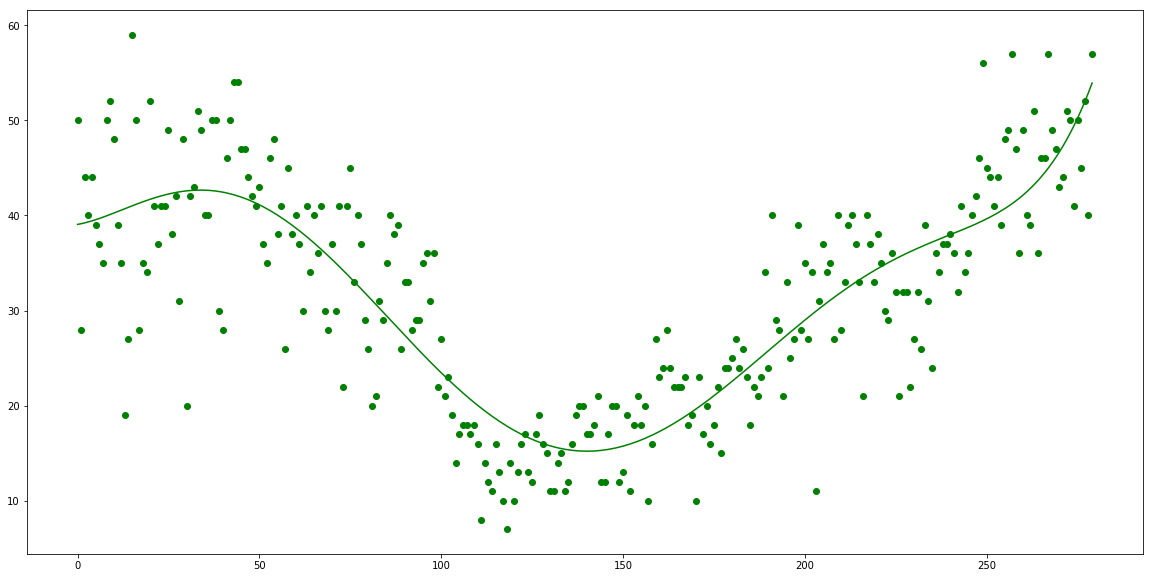

     Point  Time   X   Y  TaxiCount
279    279  2335  24  12         57
280    280  2340  24  12         40
281    281  2345  24  12         54
282    282  2350  24  12         45
283    283  2355  24  12         45
[53, 55, 56, 57, 58]


In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model = Pipeline([('poly', PolynomialFeatures(degree=6)),
                  ('linear', LinearRegression(fit_intercept=False))])

X=df.head(280)['Point'].as_matrix()
y=df.head(280)['TaxiCount'].as_matrix()

X=X.reshape(-1,1)

model.fit(X,y)

plot(X,y,model)

X_predict=np.array([279,280,281,282,283]).reshape(-1,1)


print df.tail()
print [int(x) for x in model.predict(X_predict)]



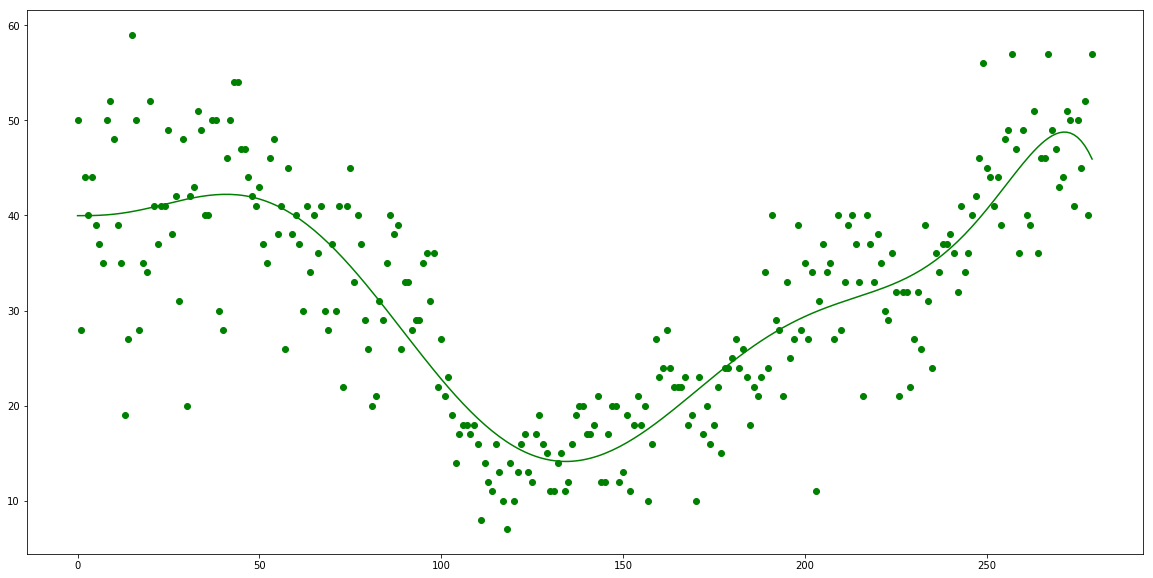

     Point  Time   X   Y  TaxiCount
279    279  2335  24  12         57
280    280  2340  24  12         40
281    281  2345  24  12         54
282    282  2350  24  12         45
283    283  2355  24  12         45
[45, 45, 43, 42, 41]


In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model = Pipeline([('poly', PolynomialFeatures(degree=8)),
                  ('linear', LinearRegression(fit_intercept=True))])

X=df.head(280)['Point'].as_matrix()
y=df.head(280)['TaxiCount'].as_matrix()

X=X.reshape(-1,1)

model.fit(X,y)

plot(X,y,model)

X_predict=np.array([279,280,281,282,283]).reshape(-1,1)


print df.tail()
print [int(x) for x in model.predict(X_predict)]

